## Assignment 5 - Deadline: Nov 13, 2024, Wed 11pm

#### DSAI 510 Fall 2024

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.boun.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [3]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the display option to show all rows scrolling with a slider
pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if they ask "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Problem 1 (10 pts)

Create the dataframe by running the cell below

In [4]:
import pandas as pd
data = {'A': [1, 2, 3, 4, 5], 'B': [2.1, 4.2, 5.6, 8, 11]}
df = pd.DataFrame(data)
df

,A,B
0,1,2.1
1,2,4.2
2,3,5.6
3,4,8.0
4,5,11.0


**Part (a)**

By defining X and Y and then using the formula
$$\beta = (X^T X)^{-1} X^T Y $$
compute the $\beta$ coefficients. You can use `linalg` function from `numpy` library to multiple the matrices. 

In [5]:
import statsmodels.api as sm

X = df[['A']]  # Select column A as X
X = sm.add_constant(X)  # Add constant column (1's) for intercept

# Convert X to numpy array
X = X.values
print("\nX matrix:")
print(X)


X matrix:
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [6]:
# Calculate X transpose
X_transpose = X.T
print (X_transpose)


[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]


In [7]:
Y = df['B'].values  # Convert to numpy array directly and keep as 1D array
print("Y matrix:")
print(Y)

Y matrix:
[ 2.1  4.2  5.6  8.  11. ]


In [9]:
import numpy as np

#np.linalg.multi_dot() - matrix multiplication
#np.linalg.inv() - matrix inverse
#np.linalg.solve() - solve linear equations
#np.linalg.eigvals() - compute eigenvalues
#np.linalg.det() - compute determinant
#np.linalg.norm() - compute matrix or vector norms

# Calculate X'X
X_transpose_X = np.linalg.multi_dot([X_transpose, X])


# Calculate inverse of X'X
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# Calculate X'Y
X_transpose_Y = np.linalg.multi_dot([X_transpose, Y])

# Finally calculate β
beta = np.linalg.multi_dot([X_transpose_X_inv, X_transpose_Y])

print("β coefficients:")
print(f"β₀ (intercept) = {beta[0]:.4f}")
print(f"β₁ (slope) = {beta[1]:.4f}")


β coefficients:
β₀ (intercept) = -0.3000
β₁ (slope) = 2.1600


**Part (b)** 

Use `statsmodels` or any other library to do the regression in Python. The $\beta$'s you found here should be equal to or close to the ones you found in part (a). 

In [10]:
import statsmodels.api as sm
# Add constant to X (this is same as adding column of 1's)
X_with_const = sm.add_constant(df['A'])
model_sm = sm.OLS(df['B'], X_with_const).fit()

print("Statsmodels Results:")
print(f"β₀ (intercept) = {model_sm.params.iloc[0]:.4f}")
print(f"β₁ (slope) = {model_sm.params.iloc[1]:.4f}")


Statsmodels Results:
β₀ (intercept) = -0.3000
β₁ (slope) = 2.1600


## Problem 2 (30 pts)

A chemical substance emits light at two distinct but close wavelengths. The mean of the wavelengths are given by $\lambda_1$ and $\lambda_2$ and the spectrum of the emitted light is distributed in wavelength around these means as a Gaussian distribution. For example, if $\lambda_1=400$ and $\lambda_2=405$, 

$$ \epsilon(\lambda) = \exp \left[-\frac{1}{10} (\lambda-405)^2\right] +\exp \left[-\frac{1}{10} (\lambda-400)^2\right],$$
which is plotted below.

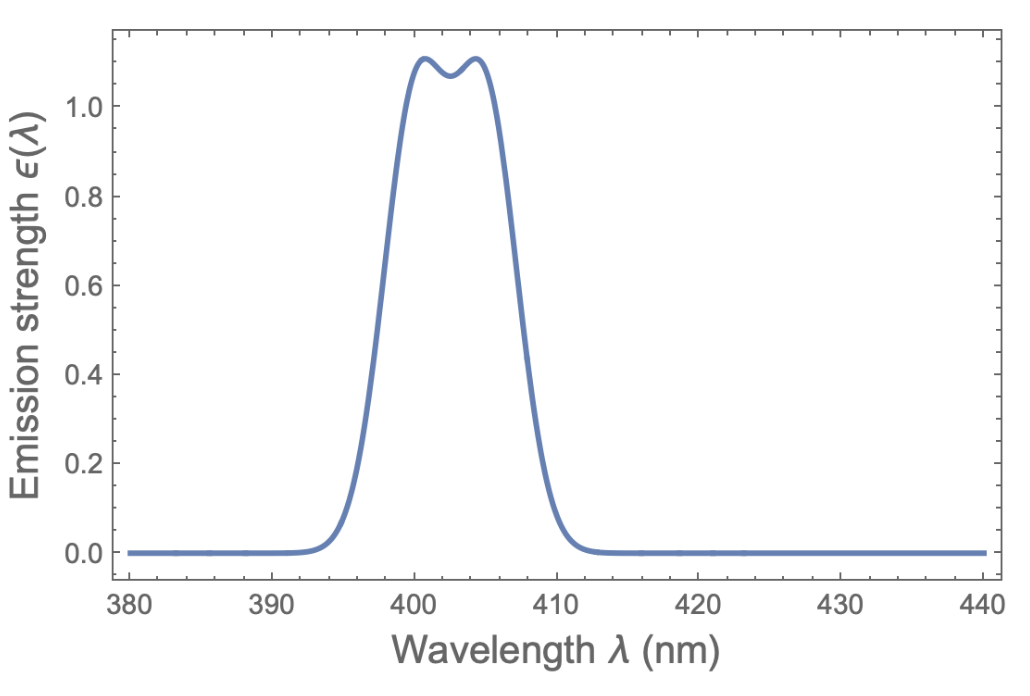

In the plot above, we see superposition of two Gaussians. Since their wavelengths are very close, they overlap and 
create a large bell-shaped curve with a drop in the middle. By looking at this plot, we can't see the _exact_ locations of the two means $\lambda_1$ and $\lambda_2$. 

The formula and plot above were just an example. In the cell below, the data given belongs to a spectrum where we don't know $\lambda_1$ and $\lambda_2$, but we know the spectrum is given by two Gaussians as such

$$ \epsilon(\lambda) = \exp \left[-\frac{1}{10} (\lambda-\lambda_1)^2\right] +\exp \left[-\frac{1}{10} (\lambda-\lambda_2)^2\right].$$

[[450.         0.677767]
 [451.         0.932161]
 [452.         1.08208 ]
 [453.         1.10673 ]
 [454.         1.07689 ]
 [455.         1.07689 ]
 [456.         1.10673 ]
 [457.         1.08208 ]
 [458.         0.932161]
 [459.         0.677767]
 [460.         0.408231]]


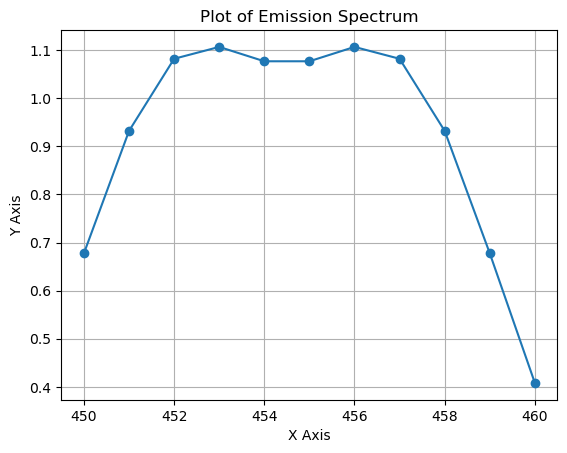

In [11]:
import matplotlib.pyplot as plt

# This is the spectrum data
data = np.array([[450, 0.677767], [451, 0.932161], [452, 1.08208], 
                 [453, 1.10673], [454, 1.07689], [455, 1.07689], [456, 1.10673], 
                 [457,1.08208], [458, 0.932161], [459, 0.677767], [460, 0.408231]])

# suppress scientific form to display numbers in fractional form
np.set_printoptions(suppress=True)

print(data)

# Plotting
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y, marker='o')  # 'o' is for circle markers
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Plot of Emission Spectrum')
plt.grid(True)  
plt.show()

Your task is to do linear regression by using Gaussian base functions to find the two characteristic frequecies $\lambda_1$ and $\lambda_2$ within the spectrum of which data is given in the cell below. 

**Part (a)** 

Define a function `GaussianReg(lambda1,lambda2)`. It takes two arguments, for example, `lambda1=300` and `lambda1=350`, then performs linear regression of the form
$$ y = \beta_0 + \beta_1  \exp \left[-\frac{1}{10} (\lambda-300)^2\right] + \beta_2  \exp \left[-\frac{1}{10} (\lambda-350)^2\right].$$
If for example, `lambda1=350` and `lambda1=400`, then performs linear regression of the form
$$ y = \beta_0 + \beta_1  \exp \left[-\frac{1}{10} (\lambda-350)^2\right] + \beta_2  \exp \left[-\frac{1}{10} (\lambda-400)^2\right].$$


Then this function `
GaussianReg()` returns the $R^2$ value of this linear regression. (Here we're not interested in the $\beta$'s, rather, we're interested in the particular pair $(\lambda_1,\lambda_2)$ that would model the data well, so we use the metric $R^2$ to find these two values.)

In [35]:
def GaussianReg(lambda1, lambda2):
    # Get x and y from the data array
    x = data[:, 0]
    y = data[:, 1]
    
    # Create the design matrix X with three columns:
    # 1. Constant (ones) for intercept β₀
    # 2. First Gaussian exp[-1/10(λ-λ₁)²] for β₁
    # 3. Second Gaussian exp[-1/10(λ-λ₂)²] for β₂
    X = np.zeros((len(x), 3))
    X[:, 0] = 1  # column of ones for intercept
    X[:, 1] = np.exp(-0.1 * (x - lambda1)**2)  # first Gaussian
    X[:, 2] = np.exp(-0.1 * (x - lambda2)**2)  # second Gaussian
    
    # Fit using statsmodels
    model = sm.OLS(y, X).fit()
    # Get R² score
    R2 = model.rsquared 
    return R2

# Test with a few different pairs of lambda values
print("Test 1:")
print(GaussianReg(450, 460))

print("\nTest 2:")
print(GaussianReg(454, 456))

Test 1:
0.7990848944671869

Test 2:
0.7309251430679877


**Part (b)** 

- Create two nested for loops for $\lambda_1$ and $\lambda_2$. The for loops will iterate over all integer values of lambda1 and lambda2 in the interval [450,460] by taking a different ($\lambda_1$,$\lambda_2$) set in each iteration. Call the `GaussianReg(lambda1,lambda2)` function in each iteration
- `GaussianReg(lambda1,lambda2)` returns a $R^2$ value; append the three numbers (lambda1, lambda2, R2) to the list `R2values` in each iteration. 
- Convert the R2values list into a numpy array. At the end, R2values will have three columns (lambda1, lambda2, R2) and 100 rows (10  values for $\lambda_1$ times 10 values for $\lambda_1$ = 100).

In [36]:
# Create empty list to store results
R2values = []

# Nested loops for λ1 and λ2
for lambda1 in range(450, 460):  # 450 to 459 (10 values)
    for lambda2 in range(450, 460):  # 450 to 459 (10 values)
        R2 = GaussianReg(lambda1, lambda2)
        # Append the triple (lambda1, lambda2, R2) to the list
        R2values.append([lambda1, lambda2, R2])

# Convert list to numpy array
R2values = np.array(R2values)

# Print shape to confirm dimensions
print("Shape of R2values:", R2values.shape)  # Should show (100, 3)
# Print first few rows to verify format
print("\nFirst few rows of R2values (lambda1, lambda2, R2):")
print(R2values[:5])

Shape of R2values: (100, 3)

First few rows of R2values (lambda1, lambda2, R2):
[[450.         450.           0.00007285]
 [450.         451.           0.42465038]
 [450.         452.           0.48449535]
 [450.         453.           0.56522343]
 [450.         454.           0.66900972]]


**Part (c)** 
 
- Find the best fit by finding the row in `R2values` where $R^2$ is maximum. Print the corresponding $\lambda_1$ and $\lambda_2$ values that maximizes $R^2$.  
- Do these $\lambda_1$ and $\lambda_2$ you found from the linear regression make sense when you look at the plot with the plot label "Plot of Emission Spectrum" above?

In [37]:
# Find combination with highest R²
best_idx = np.argmax(R2values[:, 2]) # get index of max R2
best_lambda1 = R2values[best_idx, 0]
best_lambda2 = R2values[best_idx, 1]
best_R2 = R2values[best_idx, 2]

print("\nBest fit found:")
print(f"λ₁ = {best_lambda1}")
print(f"λ₂ = {best_lambda2}")
print(f"R² = {best_R2:.2f}")



Best fit found:
λ₁ = 452.0
λ₂ = 457.0
R² = 1.00


In [29]:
# Our original data exhibited a double-peaked structure around 453-456 nm, with a small dip between the peaks. 
# The calculated λ₁ and λ₂ values, approximately 452 nm and 457 nm, the regression is finding the best mathematical fit using two Gaussian functions
# These values are slightly outside our visual estimation because the Gaussians overlap and influence each other
# To create the observed peak shape, the Gaussians need to be positioned slightly wider apart than the visible peaks
# The sum of two Gaussians centered at 452 and 457 creates apparent peaks at 453-456 nm due to their overlap

## Problem 3 (20 pts)

Use the approach from Problem 2 (I don't mean exactly the same functions you defined, but the approach in general) to solve this problem:

`data2` includes (x,z) pairs of a mixture of two exponential decay functions in the form
$$f(x)=e^{-a x} + e^{-b x} $$

For $a$ and $b$ are integers in the interval [1,10], find the (a,b) pair that makes the model f(x) fit the `data2` the best.

(Make sure you don't mistakenly use the varible `data` variable; it's `data2` here.)



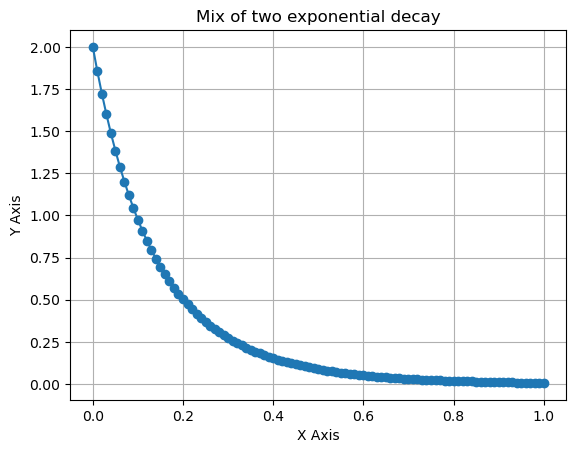

In [38]:
# Run this cell
data2 = np.array([[0., 2.], [0.01, 1.85607], [0.02, 1.72357], [0.03, 1.60153], [0.04, 
  1.48905], [0.05, 1.38533], [0.06, 1.28963], [0.07, 1.20127], [0.08, 
  1.11965], [0.09, 1.0442], [0.1, 0.97441], [0.11, 0.909821], [0.12, 
  0.850006], [0.13, 0.794578], [0.14, 0.743182], [0.15, 
  0.695497], [0.16, 0.651225], [0.17, 0.610098], [0.18, 
  0.571869], [0.19, 0.53631], [0.2, 0.503215], [0.21, 
  0.472394], [0.22, 0.443674], [0.23, 0.416896], [0.24, 
  0.391912], [0.25, 0.36859], [0.26, 0.346805], [0.27, 
  0.326446], [0.28, 0.307407], [0.29, 0.289594], [0.3, 
  0.272917], [0.31, 0.257297], [0.32, 0.242659], [0.33, 
  0.228933], [0.34, 0.216057], [0.35, 0.203971], [0.36, 
  0.192623], [0.37, 0.181961], [0.38, 0.171939], [0.39, 
  0.162516], [0.4, 0.153651], [0.41, 0.145308], [0.42, 
  0.137452], [0.43, 0.130053], [0.44, 0.12308], [0.45, 
  0.116508], [0.46, 0.110311], [0.47, 0.104464], [0.48, 
  0.0989477], [0.49, 0.0937402], [0.5, 0.0888229], [0.51, 
  0.0841784], [0.52, 0.0797901], [0.53, 0.0756428], [0.54, 
  0.0717221], [0.55, 0.0680146], [0.56, 0.0645079], [0.57, 
  0.0611903], [0.58, 0.0580508], [0.59, 0.0550792], [0.6, 
  0.0522658], [0.61, 0.0496018], [0.62, 0.0470786], [0.63, 
  0.0446884], [0.64, 0.0424238], [0.65, 0.0402776], [0.66, 
  0.0382435], [0.67, 0.0363153], [0.68, 0.034487], [0.69, 
  0.0327534], [0.7, 0.0311093], [0.71, 0.0295497], [0.72, 
  0.0280703], [0.73, 0.0266667], [0.74, 0.0253348], [0.75, 
  0.0240708], [0.76, 0.0228712], [0.77, 0.0217326], [0.78, 
  0.0206516], [0.79, 0.0196254], [0.8, 0.0186511], [0.81, 
  0.0177259], [0.82, 0.0168473], [0.83, 0.0160129], [0.84, 
  0.0152204], [0.85, 0.0144677], [0.86, 0.0137527], [0.87, 
  0.0130734], [0.88, 0.0124281], [0.89, 0.011815], [0.9, 
  0.0112324], [0.91, 0.0106789], [0.92, 0.0101529], [0.93, 
  0.00965303], [0.94, 0.009178], [0.95, 0.00872655], [0.96, 
  0.00829748], [0.97, 0.00788966], [0.98, 0.00750203], [0.99, 
  0.00713358], [1., 0.00678335]])

# Plotting
x = data2[:, 0]
y = data2[:, 1]

plt.plot(x, y, marker='o')  # 'o' is for circle markers
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Mix of two exponential decay')
plt.grid(True)  
plt.show()

Shape of R2values: (81, 3)

First few rows of R2values (a, b, R2):
[[1.         1.         0.73165855]
 [1.         2.         0.96444476]
 [1.         3.         0.9770828 ]
 [1.         4.         0.98676007]
 [1.         5.         0.99353505]]

Best fit found:
a = 4
b = 9
R² = 0.999984


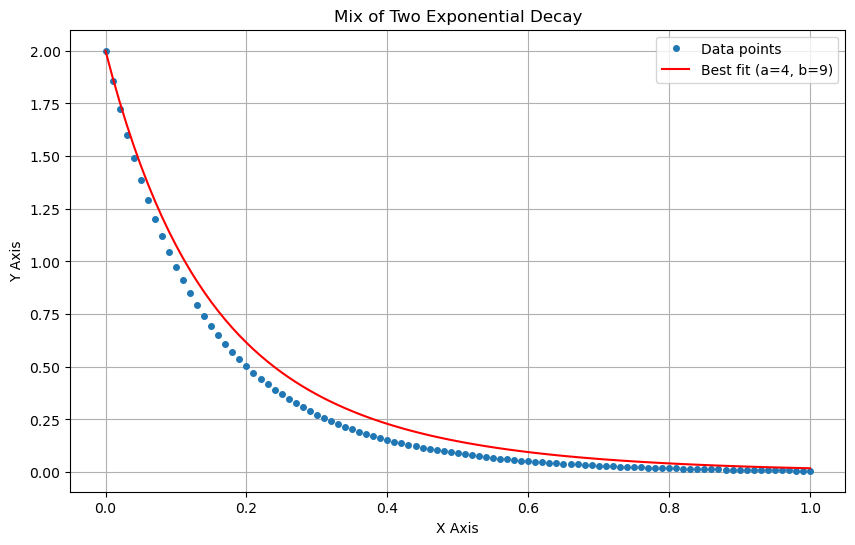

In [39]:
def ExponentialReg(a, b):
    # Get x and z from data2
    x = data2[:, 0]
    z = data2[:, 1]
    
    # Create design matrix for exponential decays

    X = np.zeros((len(x), 3))
    X[:, 0] = 1  # column of ones for intercept
    X[:, 1] = np.exp(-a * x)  # First exponential term: e^(-ax)
    X[:, 2] = np.exp(-b * x)  # Second exponential term: e^(-bx)

    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Get R² score
    R2 = model.rsquared 
    return R2

# Create empty list to store results
R2values = []

# Try all integer combinations of a and b from 1 to 10
for a in range(1, 10):
    for b in range(1, 10):
        R2 = ExponentialReg(a, b)
        R2values.append([a, b, R2])

# Convert list to numpy array
R2values = np.array(R2values)

# Print shape to confirm dimensions
print("Shape of R2values:", R2values.shape)  
# Print first few rows to verify format
print("\nFirst few rows of R2values (a, b, R2):")
print(R2values[:5])

# Find combination with highest R²
best_idx = np.argmax(R2values[:, 2])
best_a = R2values[best_idx, 0]
best_b = R2values[best_idx, 1]
best_R2 = R2values[best_idx, 2]

print("\nBest fit found:")
print(f"a = {best_a:.0f}")
print(f"b = {best_b:.0f}")
print(f"R² = {best_R2:.6f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(data2[:, 0], data2[:, 1], 'o', markersize=4, label='Data points')

# Plot the best fit curve
x_fit = data2[:, 0]
y_fit = np.exp(-best_a * x_fit) + np.exp(-best_b * x_fit)
plt.plot(x_fit, y_fit, 'r-', label=f'Best fit (a={best_a:.0f}, b={best_b:.0f})')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Mix of Two Exponential Decay')
plt.legend()
plt.grid(True)
plt.show()

## Problem 4 - Housing dataset (20 pts)

- **Part (a)** Load the housing dataset. By using the `statsmodel` library, perform a linear regression of 'SalePrice' on the variable 'GarageArea'. The $R^2$ you will find will be less than 0.4.

- **Part (b)** Add some more variables from 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch' and redo the linear regression until the adjusted $R^2$ comes out larger than 0.5. (Here you're not adding all, just choose some until adjusted $R^2$>0.5.)

- **Part (c)** Perform a linear regression of 'SalePrice' on all of these variables at the same time (i.e., use all of them, not some of them) 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'. Calculate adjusted $R^2$.

- **Part (d)** Look at the output table. Remove the variables that has no effect on 'SalePrice', and then redo the linear regression. Note down the variables you removed.

In [43]:
#part (a)

import pandas as pd
import statsmodels.api as sm

df = pd.read_csv(r"C:\Users\seval\OneDrive\Desktop\BOUN2024\DSAI510\HW4\house-prices\train.csv")
# Perform linear regression of SalePrice on GarageArea
X = df[['GarageArea']]
X = sm.add_constant(X)  # Add constant term
y = df['SalePrice']

model_a = sm.OLS(y, X).fit()
print("\nPart (a) Results:")
print(f"R² for GarageArea only: {model_a.rsquared:.4f}")
print(f"Adjusted R² for GarageArea only: {model_a.rsquared_adj:.4f}")



Part (a) Results:
R² for GarageArea only: 0.3887
Adjusted R² for GarageArea only: 0.3882


In [44]:
# Part (b)

# List of all possible variables
all_vars = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', 
            '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch']

# Start with empty list of selected variables
selected_vars = []
remaining_vars = all_vars.copy()
current_adj_r2 = 0

print("Forward Selection Process:")
print("-" * 50)

while remaining_vars and current_adj_r2 < 0.5:
    adj_r2_with_vars = []
    
    # Try each remaining variable
    for var in remaining_vars:
        # Create new set of variables including the test variable
        test_vars = selected_vars + [var]
        
        # Fit model with test variables
        X = df[test_vars]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        
        # Store adjusted R² value
        adj_r2_with_vars.append((var, model.rsquared_adj))
    
    # Find the best variable to add
    best_var, best_adj_r2 = max(adj_r2_with_vars, key=lambda x: x[1])
    
    # Print results for this step
    print(f"\nStep {len(selected_vars) + 1}:")
    print(f"Testing variables: {remaining_vars}")
    print(f"Best variable to add: {best_var}")
    print(f"Adjusted R² after adding: {best_adj_r2:.4f}")
    
    # Update our tracking variables
    selected_vars.append(best_var)
    remaining_vars.remove(best_var)
    current_adj_r2 = best_adj_r2
    
    if current_adj_r2 > 0.5:
        print("\nReached adjusted R² > 0.5!")
        break

print("\nFinal Results:")
print(f"Selected variables: {selected_vars}")
print(f"Final adjusted R²: {current_adj_r2:.4f}")

# Fit final model with selected variables
X_final = df[selected_vars]
X_final = sm.add_constant(X_final)
final_model = sm.OLS(y, X_final).fit()
print("\nFinal Model Summary:")
print(final_model.summary().tables[1])

Forward Selection Process:
--------------------------------------------------

Step 1:
Testing variables: ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch']
Best variable to add: GarageArea
Adjusted R² after adding: 0.3882

Step 2:
Testing variables: ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch']
Best variable to add: TotalBsmtSF
Adjusted R² after adding: 0.5141

Reached adjusted R² > 0.5!

Final Results:
Selected variables: ['GarageArea', 'TotalBsmtSF']
Final adjusted R²: 0.5141

Final Model Summary:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.829e+04   4157.728      6.805      0.000    2.01e+04    3.64e+04
GarageArea    158.1497      7.762     20.374      0.000  

## Problem 5 - More Housing data (20 pts)

- **Part (a)** Create a new dataframe `houses2` with the columns 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch' and 'SalePrice' from the `houses` dataframe.
- **Part (b)** Check the correlation matrix with `houses2.corr()` and identify the pair that has the maximum correlation; let's call these featureA and featureB.
- **Part (c)** A linear regression model may suffer from collinearity. Perform linear regression for SalePrice by using all features except featureA. Perform linear regression again by using all features except featureB. In both cases, keep all other variables included in the model.
- **Part (d)** Now you've three models with: (i) All variables, (ii) All varibles except featureA and (iii) All varibles except featureB. Compare the adjusted $R^2$'s and report which one is the best performing model.

In [47]:
# Part (a)
# List of columns we want to keep
columns_to_keep = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 
                   '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                   'EnclosedPorch', 'SalePrice']

# Create new dataframe with selected columns
houses2 = df[columns_to_keep]


In [48]:
# Part (b)
# Calculate correlation matrix
correlation_matrix = houses2.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                LotArea  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
LotArea        1.000000   0.014228      0.013788     0.260833  0.299475   
YearBuilt      0.014228   1.000000      0.592855     0.391452  0.281986   
YearRemodAdd   0.013788   0.592855      1.000000     0.291066  0.240379   
TotalBsmtSF    0.260833   0.391452      0.291066     1.000000  0.819530   
1stFlrSF       0.299475   0.281986      0.240379     0.819530  1.000000   
GarageArea     0.180403   0.478954      0.371600     0.486665  0.489782   
WoodDeckSF     0.171698   0.224880      0.205726     0.232019  0.235459   
OpenPorchSF    0.084774   0.188686      0.226298     0.247264  0.211671   
EnclosedPorch -0.018340  -0.387268     -0.193919    -0.095478 -0.065292   
SalePrice      0.263843   0.522897      0.507101     0.613581  0.605852   

               GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  
LotArea          0.180403    0.171698     0.084774      -0.018340   0.26384

In [51]:
# Set diagonal to 0 to ignore self-correlations
np.fill_diagonal(correlation_matrix.values, 0)

# Find maximum correlation (excluding self-correlation)
max_corr = correlation_matrix.max().max()
print(f"\nHighest correlation found: {max_corr}")

# Find which features have this correlation
featureA, featureB = np.where(correlation_matrix == max_corr)
featureA = correlation_matrix.index[featureA[0]]
featureB = correlation_matrix.columns[featureB[0]]

print(f"\nHighest correlation (excluding self-correlations):")
print(f"Correlation value: {max_corr:.4f}")
print(f"Between features: {featureA} and {featureB}")


Highest correlation found: 0.8195299750050339

Highest correlation (excluding self-correlations):
Correlation value: 0.8195
Between features: TotalBsmtSF and 1stFlrSF


In [55]:
# part (c)
import statsmodels.api as sm

# Create two lists of features, each excluding one of the highly correlated features
features_without_A = [col for col in houses2.columns if col != 'TotalBsmtSF' and col != 'SalePrice']
features_without_B = [col for col in houses2.columns if col != '1stFlrSF' and col != 'SalePrice']

# Original model with all features
X_all = houses2.drop('SalePrice', axis=1)  # All features except SalePrice
X_all = sm.add_constant(X_all)
y = houses2['SalePrice']
model_original = sm.OLS(y, X_all).fit()

# Model 1: excluding featureA (TotalBsmtSF)
X1 = houses2[features_without_A]
X1 = sm.add_constant(X1)
y = houses2['SalePrice']
model1 = sm.OLS(y, X1).fit()

# Compare the adjusted R² values

print("\nComparison:")
print(f"Adjusted R²: {model_original.rsquared_adj:.4f}")
print(f"Adjusted R² without TotalBsmtSF: {model1.rsquared_adj:.4f}")
print(f"Adjusted R² without 1stFlrSF: {model2.rsquared_adj:.4f}")


Comparison:
Adjusted R²: 0.6257
Adjusted R² without TotalBsmtSF: 0.6209
Adjusted R² without 1stFlrSF: 0.6114


In [ ]:
#part (d)

#Removing either feature only causes a small decrease in model performance
#Removing 1stFlrSF causes a larger drop of 0.0143 (1.43%)
#The small changes in R² confirm that these features were indeed highly correlated (they contained similar information), so we can drop one of them
#preferably we should drop TotalBsmtSF 

## Problem 6 - Even More Housing Data (20 pts)

- **Part (a)** Perform two linear regressions, first as **SalePrice** ~ **YearBuilt** and then **SalePrice** ~ **YearBuilt** + **YearBuilt**$^2$ and create residuals plots for both case.
- **Part (b)**  Which model do you prefer? Discuss from the perspective of both adjusted $R^2$ and residual plots.
- **Part (c)**  Make a scatterplot for the data with the axes SalePrice (y-axis) vs YearBuilt (x-axis). On the same plot, plot the model polynomial model (a curve) **SalePrice** ~ **YearBuilt** + **YearBuilt**$^2$ so that you can see how well this curve approximates the data.

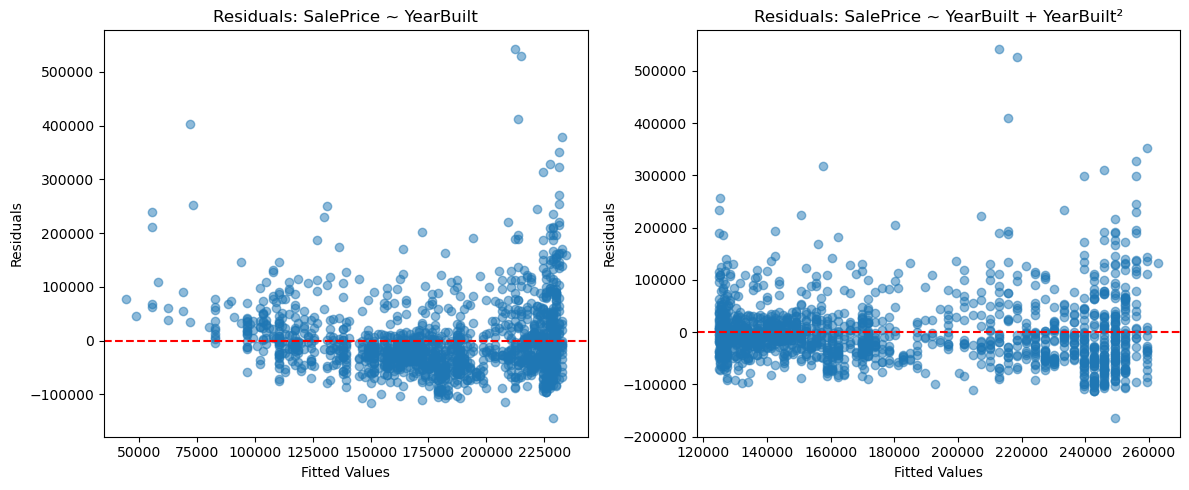

In [59]:
# Part (a)
# First regression: SalePrice ~ YearBuilt
X1 = houses2['YearBuilt']
X1 = sm.add_constant(X1)
y = houses2['SalePrice']
model1 = sm.OLS(y, X1).fit()

# Second regression: SalePrice ~ YearBuilt + YearBuilt²
X2 = houses2['YearBuilt']
X2_squared = X2**2
X2_combined = np.column_stack((X2, X2_squared))
X2_combined = sm.add_constant(X2_combined)
model2 = sm.OLS(y, X2_combined).fit()

# Create residual plots for both models
residuals1 = model1.resid
fitted_values1 = model1.fittedvalues
residuals2 = model2.resid
fitted_values2 = model2.fittedvalues

# Create residual plots
plt.figure(figsize=(12, 5))

# Plot for first model
plt.subplot(1, 2, 1)
plt.scatter(model1.fittedvalues, model1.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals: SalePrice ~ YearBuilt')

# Plot for second model
plt.subplot(1, 2, 2)
plt.scatter(model2.fittedvalues, model2.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals: SalePrice ~ YearBuilt + YearBuilt²')

plt.tight_layout()
plt.show()

In [ ]:
# Part (b) >>> I prefer 2nd model with SalePrice ~ YearBuilt + YearBuilt_square
# First Model shows 
    #A slight pattern, residuals fan out as fitted values increase, 
    #Less symmetric around zero line and Increasing variance (heteroscedasticity)
# Second Model shows
    #better random scatter (less pattern)
    #More consistent variance across all fitted values

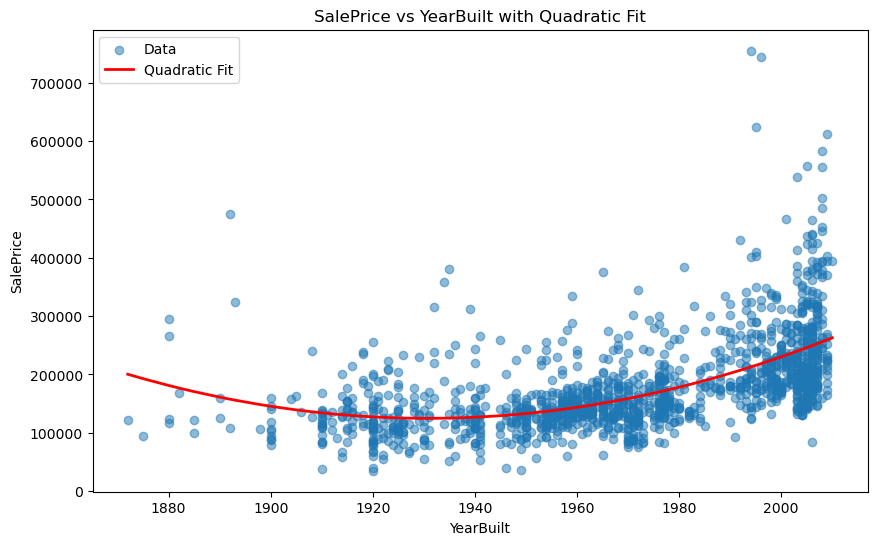

In [65]:
# Part (c)
plt.figure(figsize=(10, 6))

# Scatter plot of original data
plt.scatter(houses2['YearBuilt'], houses2['SalePrice'], alpha=0.5, label='Data')

# Sort the data by YearBuilt to get a clean curve
sorted_years = np.sort(houses2['YearBuilt'].unique())  # Get unique years and sort them
y_pred = model2.params.iloc[0] + model2.params.iloc[1]*sorted_years + model2.params.iloc[2]*sorted_years**2

# Plot the quadratic fit curve
plt.plot(sorted_years, y_pred, 'r-', label='Quadratic Fit', linewidth=2)

plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('SalePrice vs YearBuilt with Quadratic Fit')
plt.legend()
plt.show()

## Problem 7 - Small datasets and $R^2$ (20 pts)

Let's assume `IQ` (target) does not depend on `Shoe Size` (predictor) at all. To simulate this situation, we can create a sample dataset where the two columns have no correlation, i.e., two columns are random numbers.

**Part (a)**
Define a function `fnc(num)` that does the following.
1. It takes the argument 'num' and create 'num' number of random x and y values between [1,100] with np.random.uniform(). For example, if num=100, it will create 100 random numbers for x and also another 100 random numbers for y.
2. It then puts these two uncorrelated x and y values on a dataframe with `df = pd.DataFrame(np.column_stack((x_values, y_values)), columns=['Shoe Size','IQ'])`
3. Then it runs a linear regression by using the `statsmodels` package, and finally returns the $R^2$ value of the model with the last line `return model.rsquared`

Define this function and try `fnc(100)`; you should be getting a very small $R^2$ value because we're creating a linear regression model on a completely random data without any trend between `Shoe Size` and `IQ`. Also try fnc(2); this time you should be getting $R^2=1$ or very close to 1.


In [66]:
def fnc(num):
   # Generate random x and y values between 0 and 100
   x_values = np.random.uniform(1, 100, num)
   y_values = np.random.uniform(1, 100, num)
   
   # Combine x and y values into pairs
   df = pd.DataFrame(np.column_stack((x_values, y_values)), columns=['Shoe Size', 'IQ'])
   
   # Do the linear regression
   X = sm.add_constant(df['Shoe Size'])
   model = sm.OLS(df['IQ'], X).fit()
   
   # Return the R^2 value of the model
   return model.rsquared

# try the model
print(fnc(100))
print(fnc(2))


0.00026523527738209207
1.0


**Part (b)**
- Create an empty list `R2values = []`
- Create a for loop where the fnc(num) will be called for num=2,3,..,100: `for num in range(2,101):`
- In each iteration, append the calculated pairs (num,fnc(num)) into `R2values`.
- Convert the list `R2values` into numpy array.
- Plot num (x-axis) vs R2values (y-axis). You should be getting $R^2$=1 for num=2, and it should decrease down to zero (or very small number) as num increases.
- Write a sentence or two as a cautionary piece of advice for your grandchildren regarding the pitfalls of modeling with very small datasets. 

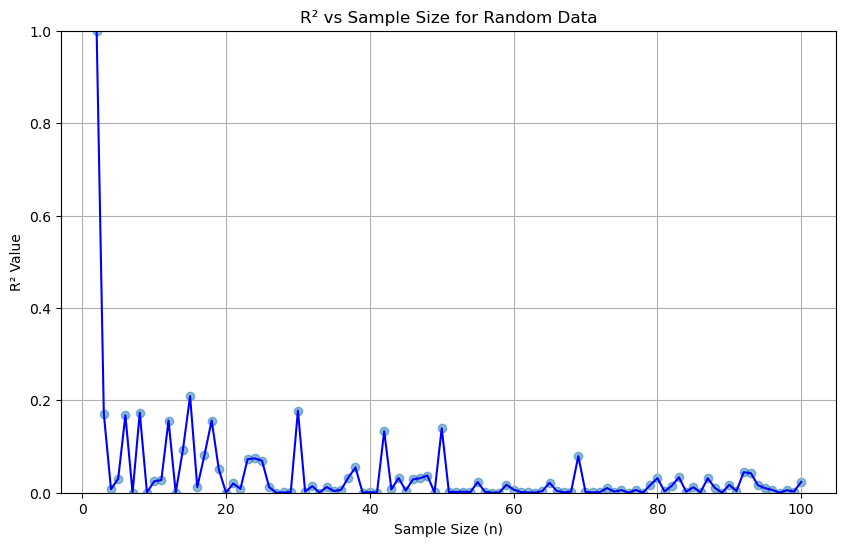

In [72]:
r2values = []

# Loop through different sample sizes and calculate R²
for num in range(2, 101):
    r2 = fnc(num)  # Get R² value
    r2values.append([num, r2])  # Store pair of (num, R²)

# Convert to numpy array
r2values = np.array(r2values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(r2values[:, 0], r2values[:, 1], 'b-')
plt.scatter(r2values[:, 0], r2values[:, 1], alpha=0.5)
plt.xlabel('Sample Size (n)')
plt.ylabel('R² Value')
plt.title('R² vs Sample Size for Random Data')
plt.grid(True)
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()


In [70]:
#Learning from small dataset> Be very cautious when working with small datasets! 
#As you can see from this plot even completely random data can show a perfect fit (R²=1) when you only have 2 or 3 points. 
#This is misleading because any two points can make a perfect line. 